In [ ]:
#기계학습을 시키는 방법의 종류가 지도학습과 비지도학습(군집화, 주성분분석_상관분석과 연관분석을 살펴볼 때 등장했던 분석법이였음)으로 나눌 수 있음
#비지도학습: 데이터만을 전달해주면서 정답을 알려주지 않고 처음부터 알고리즘이 데이터를 분류하도록 함/ 인간의 개입이 최소화하는 것.
#비지도학습이 최근에는 지도학습보다 정확도가 높아지고 있는 추세임

#군집화(Clustering) : 대표적인 군집화 알고리즘 - K 평균 알고리즘
#비지도학습의 일종으로, 데이터의 특징만으로 비슷한 데이터들끼리 모아 군집된 클래스로 분류됨 (범주화되어진 클래스로 분류해주게끔 동작)
#군집: 데이터를 그룹핑하겠다는 것. 몇 개로 데이터를 군집화할지는 개발자가 지정.

# K mean 알고리즘 진행 순서
# -> 데이터 준비(학생에 대한 키와 몸무게 데이터) 

# -> 몇 개의 클래스로 분류할 것인지 설정(갯수 설정 셋팅) => k값의 의미(몇개의 클래스로 분리할 것인지) : 3개의 집단으로 분류 셋팅

# -> ***클러스터의 최초 중심값을 설정***
#    최초 중심값의 설정은 3가지 방법중에 하나로 할 수 있음
#   (무작위 설정_3개의 점이 몰릴 수 있는 단점, 최초 중심점을 k 평균 모델에 부여_셋팅해주게 되면 인간이 개입하게 됨!!!
#    일반적으로 사이킷런의 k 평균 라이브러리를 활용_kmean에 ++의 알고리즘을 사용해서 클러스터의 최초 중심을 설정)
#    ***거리를 계산하면서 가까이에 있는 놈들로 그룹핑을 해가는 알고리즘이다. 
#        아까 찾은 최초 중심점을 중간으로 바꿈!!

# -> 데이터를 가장 가까운 클러스터로 지정
# 그렇게 지정된 클러스터를 중심으로 클러스터에 속한 데이터들을 가운데 위치로 변경, 
# 중심이 바뀌지 않을 때까지 두 동작(4번과 5번)을 끊임없이 반복

In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

np.random.seed(5)

# 데이터 만들기
* 사람들의 키와 몸무게 데이터를 만든다.

In [2]:
df = pd.DataFrame(columns=['height', 'weight'])

df.loc[0] = [185, 60] #7명의 학생에 대한 키와 몸무게 정보를 각각 저장해주도록 함
df.loc[1] = [180, 60]
df.loc[2] = [185, 70]
df.loc[3] = [165, 63]
df.loc[4] = [155, 68]
df.loc[5] = [170, 75]
df.loc[6] = [175, 80]

In [3]:
df.head(7)

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,175,80


# 데이터 시각화
* 데이터를 차트에 시각화
* 위 데이터를 가지고 분류하고 싶은 것이다. -> 데이터를 나누기 전에 분포도를 확인하도록 한다.

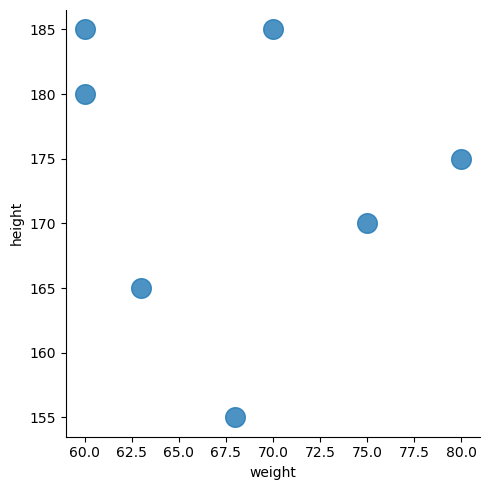

In [4]:
sns.lmplot(data=df, x='weight', y='height', fit_reg=False, scatter_kws={'s':200}) 
#주의) 축에 따른 필드를 지정해줄 때는 문자열로 감싸서 지정해주면 됨
#fit_reg 회귀분석의 라인까지 그려줄 것인지 설정하는 파라메타

# K 평균 군집화
* sklearn의 kmean 라이브러리에 데이터를 활용하여, 데이터를 군집화 함.

In [5]:
data_points = df.values
kmeans = KMeans(n_clusters=3).fit(data_points) #각 데이터에 대한 포인트위치만 알려주면 이 알고리즘이 k means알고리즘으로 해서 모델을 만듦.

* 아래 명령어로 각 군집의 중심 위치를 확인할 수 있다.

In [6]:
kmeans.cluster_centers_ # 3개의 기준값에 대한 정보를 바로 보여줌

array([[160.        ,  65.5       ],
       [183.33333333,  63.33333333],
       [172.5       ,  77.5       ]])

* 데이터가 어느 군집에 소속되어 있는 지 데이터 프레임에 cluster_id 컬럼에 저장.

In [7]:
df['cluster_id'] = kmeans.labels_

In [8]:
df.head(7) # 학습이 끝났을 때 어떤 분류군으로 그룹핑되어있는지 확인

,height,weight,cluster_id
0,185,60,1
1,180,60,1
2,185,70,1
3,165,63,0
4,155,68,0
5,170,75,2
6,175,80,2


# K 평균 군집 시각화
* 군집 결과를 seaborn과 dataframe을 활용하여 손쉽게 시각화할 수 있음.
* 키가 작은 그룹, 중간 그룹, 큰 그룹으로 군집된 결과를 각기 다른 색으로 구분된 군집으로 확인할 수 있음.

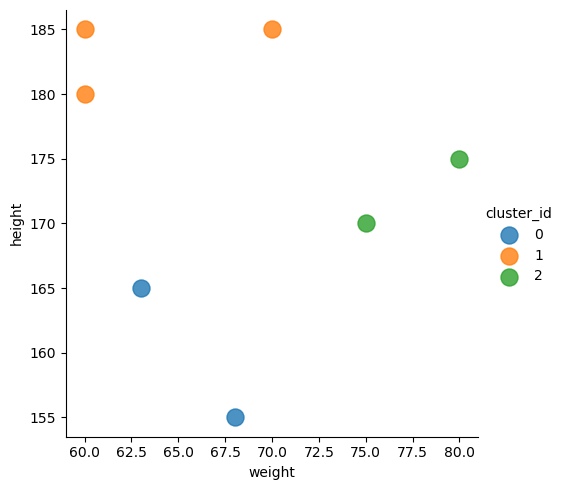

In [9]:
sns.lmplot(data=df, x='weight', y='height', fit_reg=False, scatter_kws={'s':150}, hue='cluster_id')